In [1]:
'''
As the balanced random forest, is used to handle imbalanced datasets by undersampling the majority class.
as we train multiple decision trees on different balanced subsets of the data.
the final prediction is made by aggregating the predictions from all the trees.

In this the each model get samples from both classes equally.
This helps in reducing bias towards majority class and improves the model's ability to generalize to minority class.
'''

"\nAs the balanced random forest, is used to handle imbalanced datasets by undersampling the majority class.\nas we train multiple decision trees on different balanced subsets of the data.\nthe final prediction is made by aggregating the predictions from all the trees.\n\nIn this the each model get samples from both classes equally.\nThis helps in reducing bias towards majority class and improves the model's ability to generalize to minority class.\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


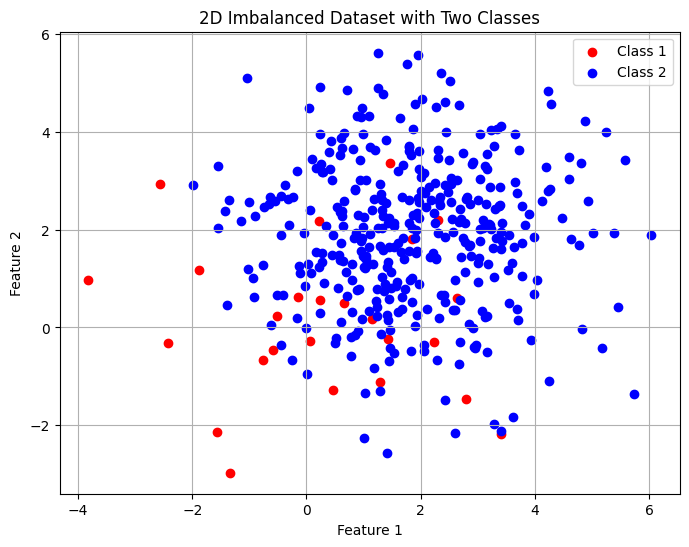

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Classification Report (With Balanced Random Forest):
              precision    recall  f1-score   support

           0       0.13      0.50      0.21         4
           1       0.97      0.83      0.89        76

    accuracy                           0.81        80
   macro avg       0.55      0.66      0.55        80
weighted avg       0.93      0.81      0.86        80

ROC AUC Score (With Balanced Random Forest): 0.8273026315789473


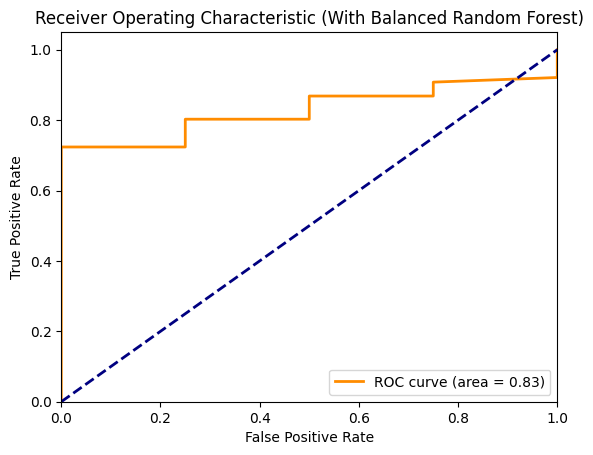

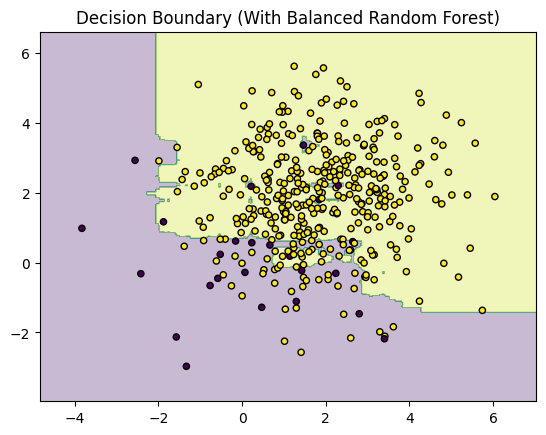

In [5]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Balanced Random Forest Classifier
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for Balanced Random Forest data
print("Classification Report (With Balanced Random Forest):")
print(classification_report(y_test, y_pred_brf))

# Print ROC AUC Score for Balanced Random Forest data
print("ROC AUC Score (With Balanced Random Forest):", roc_auc_score(y_test, y_proba_brf))

# Plotting ROC AUC Curve for Balanced Random Forest data
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Balanced Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Function to plot decision boundaries for Balanced Random Forest data
def plot_decision_boundaries_brf(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Balanced Random Forest)")
    plt.show()

# Plot decision boundary for Balanced Random Forest data
plot_decision_boundaries_brf(X, y, classifier)